In [31]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import os
import seaborn as sn
import matplotlib.pyplot as plt

In [32]:
os.getcwd()

'C:\\Users\\Home\\Desktop\\DataTrained'

In [33]:
happiness=pd.read_csv('happiness_score.csv',sep=',',header=0, encoding="latin")

In [34]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [35]:
happiness.shape

(158, 12)

In [36]:
happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Problem Statement: To Predict Happiness Score


Target Variable: Hapiness Score

In [37]:
#EDA Process

In [38]:
happiness.count()

Country                          158
Region                           158
Happiness Rank                   158
Happiness Score                  158
Standard Error                   158
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         158
Freedom                          158
Trust (Government Corruption)    158
Generosity                       158
Dystopia Residual                158
dtype: int64

In [39]:
happiness.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

From above it is observe that we have total 158 rows and 12 clomuns.
Independent varibales are 11.
Null values are 0 for all the columns present.

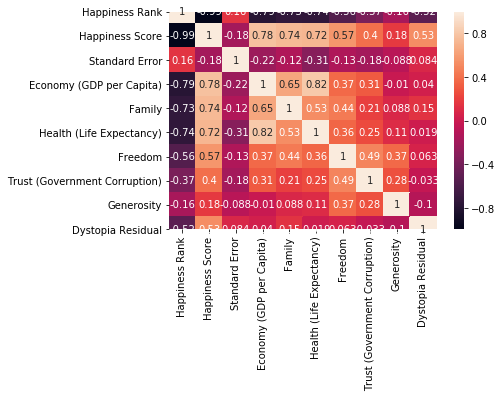

In [40]:
corrMatrix = happiness.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Correlation matrix shows the relation between dependent and independent varibales.
Happiness Rank and happiness score are strongly corelated as they should be. So if we drop the column Happiness Rank, it will npt affect the overall data.

In [44]:
import plotly.graph_objects as go
from plotly.offline import plot

In [46]:
data = dict(type = 'choropleth', 
           locations = happiness['Country'],
           locationmode = 'country names',
           z = happiness['Happiness Rank'], 
           text = happiness['Country'],
          colorscale = 'Viridis', reversescale = False)
layout = dict(title = 'Happiness Rank Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap = go.Figure(data = [data], layout=layout)
plot(choromap)

'temp-plot.html'

On runing the above code will open up a HTML where a map in which countries are colored according to happiness rank.he countries that are a darker red have a higher score (thus are ranked higher). The countries with a lighter shade have a lower score.

In [50]:
data1 = dict(type = 'choropleth', 
           locations = happiness['Country'],
           locationmode = 'country names',
           z = happiness['Happiness Score'], 
           text = happiness['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Score Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap2 = go.Figure(data = [data1], layout=layout)
plot(choromap2)

'temp-plot.html'

Above code will give world map for the Happiness score for the countries present in the data.

In [55]:
drop_rank = happiness.drop("Happiness Rank", axis = 1)

In [59]:
corr_matrix_happy = drop_rank.corr()
trace_corr_happy = go.Heatmap(z=np.array(corr_matrix_happy), x=corr_matrix_happy.columns, y=corr_matrix_happy.columns)
data_happy=[trace_corr_happy]
plot(data_happy)

'temp-plot.html'

In [72]:
dropped_happy = happiness.drop(["Country", "Happiness Rank","Region"], axis=1)
dropped_happy.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Dropping the fields having high correlation and which seems not contributing to output variable

In [62]:
#Modelling

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(dropped_happy.drop("Happiness Score", axis=1), dropped_happy['Happiness Score'], test_size = 0.2,\
                                                    random_state=20)

Adding the constant vector for constant beta value for calculation of linear regression equation

In [75]:
import statsmodels.api as sm

In [76]:
X_train = sm.add_constant(X_train)

Fitting the OLS model

In [77]:
model = sm.OLS(Y_train, X_train.astype(float))


In [78]:
result = model.fit()

In [79]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.640e+08
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:04:04   Log-Likelihood:                 854.52
No. Observations:                 126   AIC:                            -1691.
Df Residuals:                     117   BIC:                            -1666.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

We observe that p-value for Standard Error and Economy is greater than 0.05 significance level, this may affect the acuracy of the model.
R-squared is 1 which shows perfect fit.

Finding the residual values from predicted model

In [80]:
res = result.resid

In [81]:
res.head(3)

66     3.170613e-04
46     2.839683e-04
108    5.235808e-07
dtype: float64

Generating qq plot for residual analysis

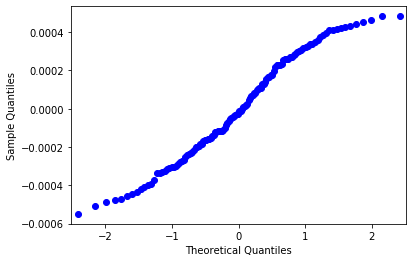

In [82]:
fig = sm.qqplot(res)
plt.show()

Here the qq plot is somewhat showing normal distribution,thus is show that that residuals are normally distributed.

Finding R-SQUARED value on the test dataset for the model

In [83]:
from sklearn.metrics import r2_score

In [85]:
predictions = result.predict(sm.add_constant(X_test))
r2_score(Y_test, predictions)

0.9999999223705655

Accuracy of the model is coming 99%